In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functions import Cleaner
from Models import Models
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost




In [2]:
df=pd.read_csv('../data/churn_train.csv')
df_test=pd.read_csv('../data/churn_test.csv')

In [3]:
cols=df.columns.tolist()
clean = Cleaner(cols)

clean.fit(df)
X_train=clean.transform(df)
y_train = clean.get_target(df)

X_test=clean.transform(df_test)
y_test = clean.get_target(df_test)

In [4]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_dist,40000.0,5.791302,5.708056,0.0,2.42,3.88,6.93,160.96
avg_rating_by_driver,40000.0,4.777434,0.447180,1.0,4.70,5.00,5.00,5.00
avg_rating_of_driver,40000.0,4.601697,0.562407,1.0,4.50,4.70,5.00,5.00
avg_surge,40000.0,1.074956,0.222427,1.0,1.00,1.00,1.05,8.00
last_trip_date,40000.0,735342.231425,61.794023,735234.0,735278.00,735361.00,735401.00,735415.00
signup_date,40000.0,735249.539500,8.749512,735234.0,735242.00,735250.00,735257.00,735264.00
surge_pct,40000.0,8.857342,20.014008,0.0,0.00,0.00,8.30,100.00
trips_in_first_30_days,40000.0,2.280700,3.811289,0.0,0.00,1.00,3.00,125.00
luxury_car_user,40000.0,0.376150,0.484424,0.0,0.00,0.00,1.00,1.00
weekday_pct,40000.0,60.874382,37.089619,0.0,33.30,66.70,100.00,100.00


In [5]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_dist,10000.0,5.818925,5.704789,0.0,2.42,3.89,6.99,79.34
avg_rating_by_driver,10000.0,4.781056,0.440010,1.0,4.70,5.00,5.00,5.00
avg_rating_of_driver,10000.0,4.601011,0.575169,1.0,4.50,4.80,5.00,5.00
avg_surge,10000.0,1.073996,0.221982,1.0,1.00,1.00,1.05,5.00
last_trip_date,10000.0,735342.748200,61.419253,735234.0,735280.00,735361.00,735402.00,735415.00
signup_date,10000.0,735249.565400,8.773438,735234.0,735242.00,735250.00,735257.00,735264.00
surge_pct,10000.0,8.818310,19.737440,0.0,0.00,0.00,9.10,100.00
trips_in_first_30_days,10000.0,2.268200,3.717506,0.0,0.00,1.00,3.00,71.00
luxury_car_user,10000.0,0.380800,0.485608,0.0,0.00,0.00,1.00,1.00
weekday_pct,10000.0,61.132890,37.050156,0.0,33.30,66.70,100.00,100.00


<AxesSubplot:>

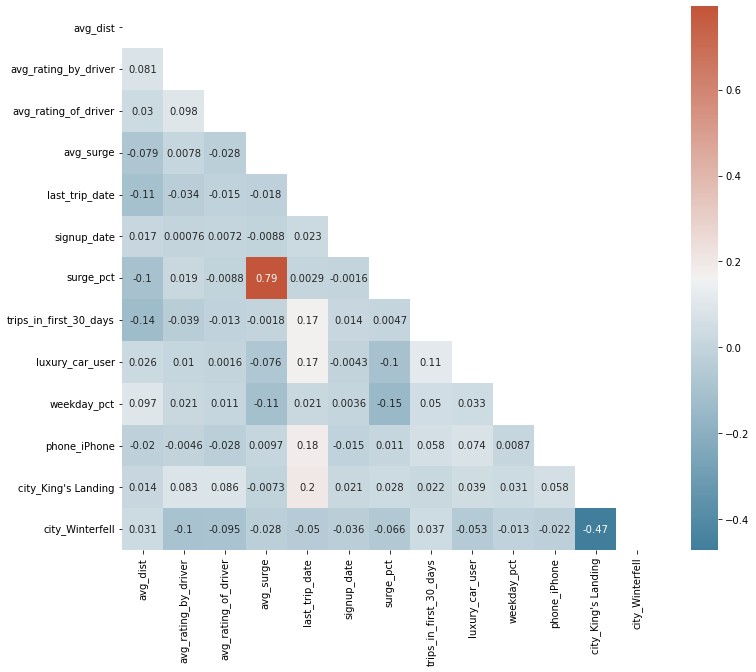

In [6]:
corr = X_train.corr()
f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

array([[<AxesSubplot:title={'center':'avg_dist'}>,
        <AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:title={'center':'avg_rating_of_driver'}>],
       [<AxesSubplot:title={'center':'avg_surge'}>,
        <AxesSubplot:title={'center':'surge_pct'}>,
        <AxesSubplot:title={'center':'trips_in_first_30_days'}>],
       [<AxesSubplot:title={'center':'weekday_pct'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

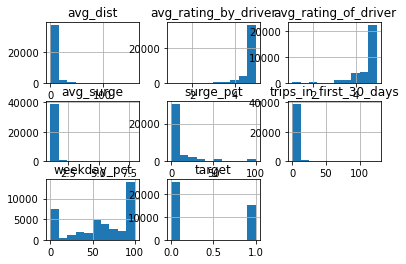

In [7]:
df.hist()

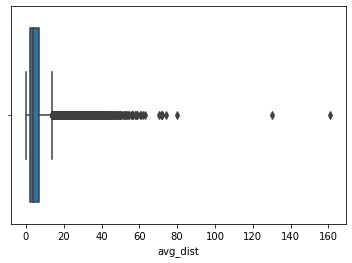

In [8]:
ax = sns.boxplot(x=df['avg_dist'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
 12  target                  40000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 3.7+ MB


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    40000 non-null  float64
 2   avg_rating_of_driver    40000 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   last_trip_date          40000 non-null  int64  
 5   signup_date             40000 non-null  int64  
 6   surge_pct               40000 non-null  float64
 7   trips_in_first_30_days  40000 non-null  int64  
 8   luxury_car_user         40000 non-null  int32  
 9   weekday_pct             40000 non-null  float64
 10  phone_iPhone            40000 non-null  float64
 11  city_King's Landing     40000 non-null  float64
 12  city_Winterfell         40000 non-null  float64
dtypes: float64(9), int32(1), int64(3)
memory usage: 3.8 MB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                10000 non-null  float64       
 1   avg_rating_by_driver    10000 non-null  float64       
 2   avg_rating_of_driver    10000 non-null  float64       
 3   avg_surge               10000 non-null  float64       
 4   last_trip_date          10000 non-null  datetime64[ns]
 5   signup_date             10000 non-null  datetime64[ns]
 6   surge_pct               10000 non-null  float64       
 7   trips_in_first_30_days  10000 non-null  int64         
 8   luxury_car_user         10000 non-null  int32         
 9   weekday_pct             10000 non-null  float64       
 10  phone_iPhone            10000 non-null  float64       
 11  city_King's Landing     10000 non-null  float64       
 12  city_Winterfell         10000 non-null  float64

In [11]:
modelos = [KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier]
r2s = []
acc_scores = []
prec_scores = []



for model in modelos:
    models = Models(model)
    r2_score, acc_score, prec_score = models.mod(X_train, y_train, X_test, y_test)
    r2s.append(r2_score)
    acc_scores.append(acc_score)
    prec_scores.append(prec_score)

<BarContainer object of 4 artists>

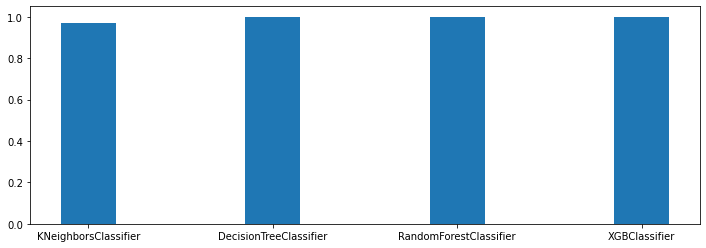

In [12]:
plt.figure(figsize=(12,4))
plt.bar(x=[m.__name__ for m in modelos], height = r2s, width=0.3)

[0.9931, 1.0, 1.0, 1.0]

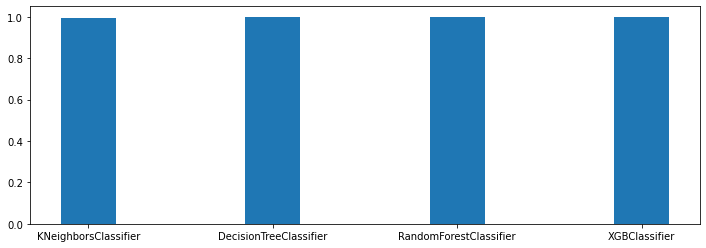

In [20]:
plt.figure(figsize=(12,4))
plt.bar(x=[m.__name__ for m in modelos], height = acc_scores, width=0.3)
acc_scores

[0.988909426987061, 1.0, 1.0, 1.0]

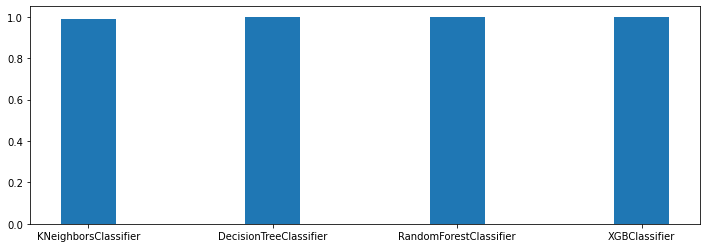

In [19]:
plt.figure(figsize=(12,4))
plt.bar(x=[m.__name__ for m in modelos], height = prec_scores, width=0.3)
prec_scores

In [13]:
y_test.value_counts()

0    6228
1    3772
Name: target, dtype: int64